In [1]:
# -*- coding: utf-8 -*-

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from smallervggnet import SmallerVGGNet
from imutils import paths
import glob
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
EPOCHS = 100
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (100, 100, 3)
 
# initialize the data and labels
data = []
labels = []
Abs_path='D:\\Great Learning\\R7\\train\\'
# grab the image paths and randomly shuffle them
print("[INFO] loading images...")
for imgPath in list(paths.list_images(Abs_path)):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imgPath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)
    label=imgPath.split('\\')[-2]
    labels.append(label)
    
    
        

Using TensorFlow backend.


[INFO] loading images...


In [2]:
from sklearn.preprocessing import LabelBinarizer
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {:.2f}MB".format(data.nbytes / (1024 * 1000.0)))
 
# binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
 
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.2, random_state=42)

[INFO] data matrix: 1113.28MB


In [3]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
horizontal_flip=True, fill_mode="nearest")

In [4]:
# initialize the model
print("[INFO] compiling model...")
model = SmallerVGGNet.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
depth=IMAGE_DIMS[2], classes=len(lb.classes_))
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])
 
# train the network
print("[INFO] training network...")
H = model.fit_generator(
aug.flow(trainX, trainY, batch_size=BS),
validation_data=(testX, testY),
steps_per_epoch=len(trainX) // BS,
epochs=EPOCHS, verbose=1)

[INFO] compiling model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
118/118 [==============================] - 31s 266ms/step - loss: 2.0016 - acc: 0.4367 - val_loss: 1.5312 - val_acc: 0.5632
Epoch 2/100
118/118 [==============================] - 21s 177ms/step - loss: 1.2381 - acc: 0.6213 - val_loss: 1.9994 - val_acc: 0.5779
Epoch 3/100
118/118 [==============================] - 20s 170ms/step - loss: 1.0740 - acc: 0.6660 - val_loss: 1.2210 - val_acc: 0.6884
Epoch 4/100
118/118 [==============================] - 20s 172ms/step - loss: 0.8661 - acc: 0.7211 - val_loss: 1.1845 - val_acc: 0.7284
Epoch 5/100
118/118 [==============================] - 20s 171ms/step - loss: 0.7229 - acc: 0.7610 - val_loss: 0.9085 - val_acc: 0.7411
Epoch 6/100
118/118 [===========

Epoch 54/100
118/118 [==============================] - 27s 232ms/step - loss: 0.2489 - acc: 0.9121 - val_loss: 1.1706 - val_acc: 0.7316
Epoch 55/100
118/118 [==============================] - 24s 207ms/step - loss: 0.2270 - acc: 0.9197 - val_loss: 0.6145 - val_acc: 0.8505
Epoch 56/100
118/118 [==============================] - 30s 252ms/step - loss: 0.1716 - acc: 0.9387 - val_loss: 1.8551 - val_acc: 0.6221
Epoch 57/100
118/118 [==============================] - 27s 227ms/step - loss: 0.1942 - acc: 0.9295 - val_loss: 0.6866 - val_acc: 0.8021
Epoch 58/100
118/118 [==============================] - 27s 230ms/step - loss: 0.1996 - acc: 0.9272 - val_loss: 0.2810 - val_acc: 0.9126
Epoch 59/100
118/118 [==============================] - 28s 235ms/step - loss: 0.1991 - acc: 0.9320 - val_loss: 6.0455 - val_acc: 0.3432
Epoch 60/100
118/118 [==============================] - 27s 232ms/step - loss: 0.2223 - acc: 0.9226 - val_loss: 0.5675 - val_acc: 0.8484
Epoch 61/100
118/118 [===================

In [5]:
# save the model to disk
print("[INFO] serializing network...")
model.save('Plant_classifier.model')
 
# save the label binarizer to disk
print("[INFO] serializing label binarizer...")
f = open('labels.pickle', "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network...
[INFO] serializing label binarizer...


NameError: name 'pickle' is not defined

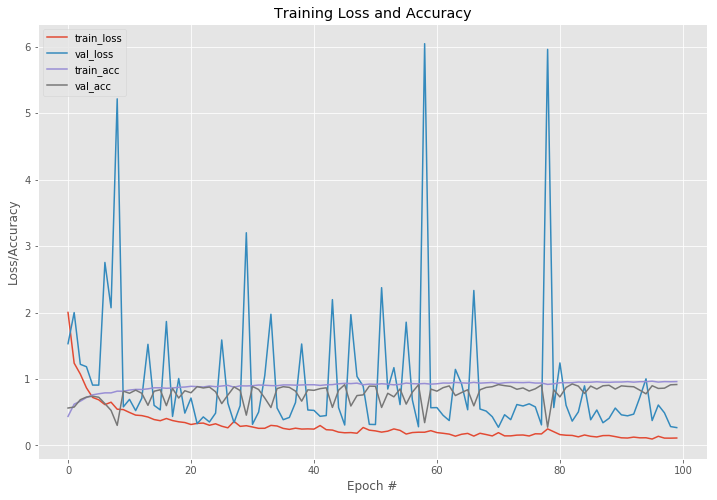

In [8]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
#plt.savefig(args["plot"])